In [ ]:
from agoge_yt import *
 
hdf5_filename = "../agoge_final.h5"  # Replace with your actual HDF5 file path
visualize_agoge_data(hdf5_filename)


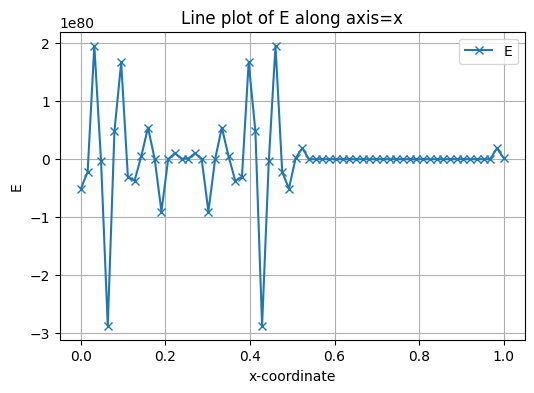

In [1]:
import agoge_viz as av

# 1) read data
data = av.read_agoge_hdf5("../agoge_final.h5")

# 2) line plot
av.plot_line(data, field="E", axis="x", index_j=0, index_k=0)

# 3) slice plot
# av.plot_slice(data, field="phi", plane="z", plane_index=10)
